# Capstone 2: Erasmus Program Mobility 

## Exploratory Data Analysis (EDA)

## Table of Contents
* [About This DataFrame](#about_dataframe)
    *  [Prepare the data](#prepare_data)
    *  [Review histograms](#review_histograms) 

* [Funding](#funding) 
    *  [Funding per academic year](#funding_year)
    *  [Funding by activity](#funding_activity)
    *  [Total funding per country](#funding_country)
    *  [Funding per country over the years](#funding_country) XXXmultiple line plot
    
* [Projects](#projects) 
    *  [Number of projects per academic year](#projects_year) 
    *  [Relationship of projects and funding per academic year](#projects_funding_year)
    *  [Number of projects started and ended by month, 2014-2019](#projects_start_end_month)
    *  [Average project duration by year](#average_project_duration)

* [Participants](#participants) 
    *  [Participant start and end months](#participant_start_end_month)
    *  [Sending and receiving countries by participant](#send_receive_participant)
    *  [Participant gender](#participant_gender)
    *  [Participant age](#participant_age)

* [Summary](#summary)

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from calendar import month_name

In [2]:
# Load the projects dataset
erasmus = pd.read_csv('C:/Users/midol/Documents/Springboard/Springboard/Capstone_2/Erasmus/erasmus_clean.csv')

C:\Users\midol\AppData\Local\Temp\ipykernel_14156\892422333.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  erasmus = pd.read_csv('C:/Users/midol/Documents/Springboard/Springboard/Capstone_2/Erasmus/erasmus_clean.csv')


In [3]:
erasmus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3462074 entries, 0 to 3462073
Data columns (total 26 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   project_id               object 
 1   academic_year            object 
 2   start_month              object 
 3   end_month                object 
 4   duration_in_days         int64  
 5   activity                 object 
 6   field_of_education       object 
 7   participant_nationality  object 
 8   education_level          object 
 9   participant_gender       object 
 10  participant_role         object 
 11  special_needs            int64  
 12  fewer_opportunities      int64  
 13  groupleader              int64  
 14  participant_age          float64
 15  sending_country          object 
 16  sending_city             object 
 17  receiving_country        object 
 18  receiving_city           object 
 19  # of participants        float64
 20  key_action               object 
 21  action_t

In [4]:
erasmus.head().T

,0,1,2,3,4
project_id,2014-1-AT01-KA101-000059,2014-1-AT01-KA101-000059,2014-1-AT01-KA101-000059,2014-1-AT01-KA101-000059,2014-1-AT01-KA101-000059
academic_year,2014-2015,2014-2015,2014-2015,2014-2015,2015-2016
start_month,2014-07,2014-07,2014-07,2014-08,2015-04
end_month,2014-07,2014-08,2014-08,2014-08,2015-04
duration_in_days,12,7,12,12,4
activity,Staff training abroad,Staff training abroad,Staff training abroad,Staff training abroad,Staff training abroad
field_of_education,Language acquisition,Language acquisition,Language acquisition,Language acquisition,Language acquisition
participant_nationality,AT,AT,AT,CZ,AT
education_level,NaN,NaN,NaN,NaN,NaN
participant_gender,Female,Female,Female,Female,Female


### About this DataFrame <a class="anchor" id="about_dataframe"></a>
- Each row represents an Erasmus participant (`participant_id`). 
- Each participant was involved in a project (`project_id`).
- Each project was funded by a grant (`grant_in_euros`).

Therefore:
- Projects can have more than one participant.
- Projects are duplicated in this DataFrame.
- `grant_in_euros` represents grant per project (not participant).


### Prepare the data <a id="prepare_data"></a>

To better structure this data for analysis, we do the following:
- Sort columns chronologically and reset the index
- Add a 'participant_id' column
- Add an `allocated_grant` column, which is grant funding allocated by participant.


In [5]:
# Sort by columns chronologically and reset index
erasmus = erasmus.sort_values(by=['academic_year', 'start_month', 'end_month'])
erasmus.reset_index(drop=True, inplace=True)

# Add a 'participant_id' column
participant_id = erasmus.index + 1  # Adding 1 to start IDs from 1 instead of 0
erasmus.insert(0, 'participant_id', participant_id)
erasmus.head().T

# Allocate 'grant_in_euros' among the participants based on 'project_id'.
# Group by 'project_id' and count the participants for each project
participant_counts = erasmus.groupby('project_id')['participant_id'].transform('count')

# Divide 'grant_in_euros' by the number of participants to get the allocated grant amount for each participant
erasmus['allocated_grant'] = erasmus['grant_in_euros'] / participant_counts

erasmus.head().T

,0,1,2,3,4
participant_id,1,2,3,4,5
project_id,2014-1-MT01-KA104-000103,2014-1-AT01-KA102-000262,2014-1-AT01-KA102-000262,2014-1-AT01-KA102-000262,2014-1-AT01-KA102-000262
academic_year,2014-2015,2014-2015,2014-2015,2014-2015,2014-2015
start_month,2014-05,2014-06,2014-06,2014-06,2014-06
end_month,2014-06,2014-06,2014-06,2014-06,2014-06
duration_in_days,42,13,15,15,15
activity,Staff training abroad,Training/teaching assignments abroad,VET learners traineeships in vocational instit...,VET learners traineeships in vocational instit...,VET learners traineeships in vocational instit...
field_of_education,Architecture and construction,Business and administration,Business and administration,Business and administration,Business and administration
participant_nationality,MT,AT,AT,AT,AT
education_level,NaN,NaN,NaN,NaN,NaN


### Review histograms <a id="review_histograms"></a>

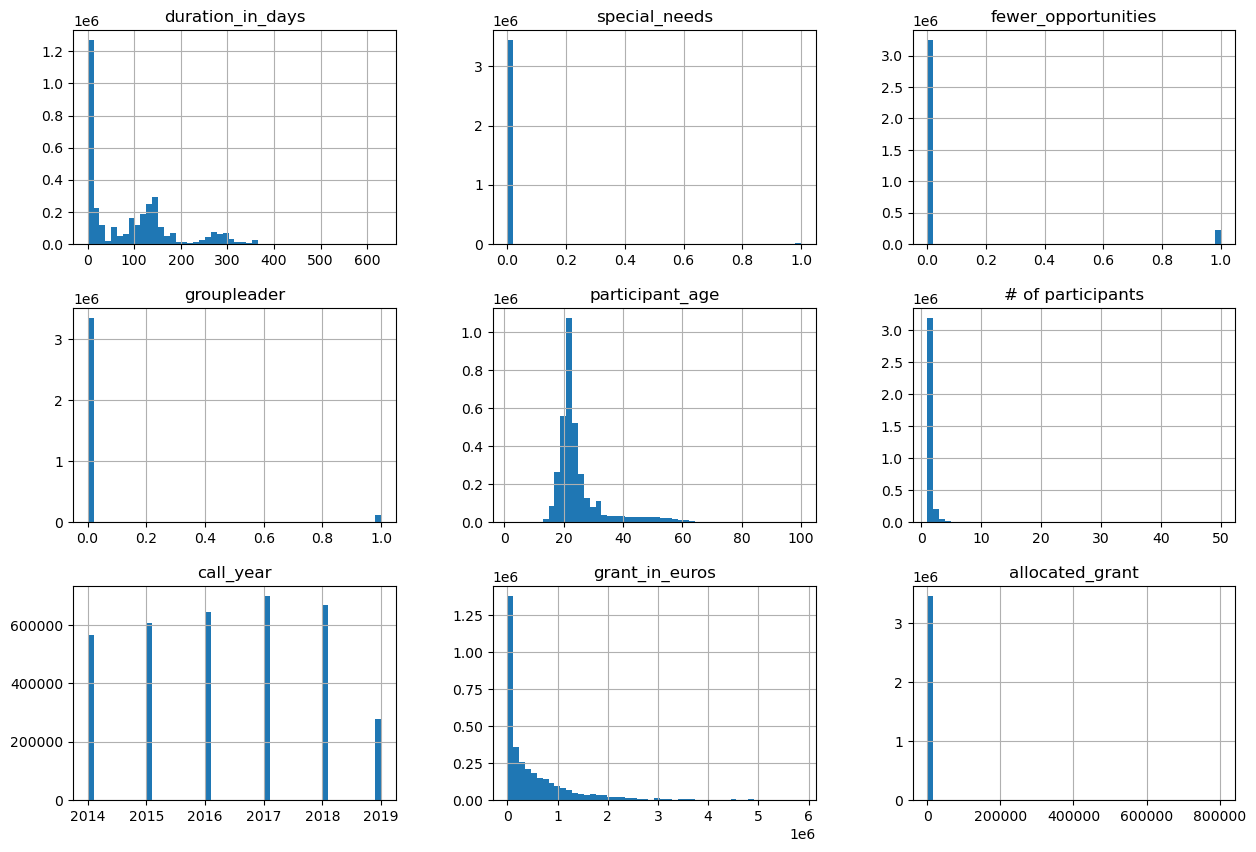

In [6]:
# Exclude 'participant_id'
erasmus_excl_pid = erasmus.drop(columns=['participant_id'])

# Plot histograms
erasmus_excl_pid.hist(bins=50, figsize=(15, 10))
plt.show()

## Funding <a id="funding"></a>


Because projects are duplicated, we create a DataFrame of unique projects, which will allow us to review:  
- funding by project
- number of projects per academic year


In [7]:
# Verify number of projects in 'erasmus' DataFrame.
erasmus['project_id'].nunique()

92060

In [8]:
# Create a DataFrame without duplicate projects.
unique_projects_df = erasmus.drop_duplicates(subset='project_id', keep='first')
unique_projects_df.shape


(92060, 28)

In [9]:
# Preprocess data: Group by academic year to count projects and sum funding
summary_df = unique_projects_df.groupby('academic_year').agg(
    project_count=('project_id', 'size'),
    funding_sum=('grant_in_euros', 'sum')
).reset_index()

summary_df


,academic_year,project_count,funding_sum
0,2014-2015,8058,7.071136e+08
1,2015-2016,16136,1.009323e+09
2,2016-2017,15857,1.119217e+09
3,2017-2018,17044,1.258731e+09
4,2018-2019,17781,1.386121e+09
5,2019-2020,17184,1.369924e+09


In [10]:
# Function for bar plots for project and funding by academic_year
def plot_bar(title, df, x, xlabel, y, ylabel):
    plt.figure(figsize=(8, 5))
    sns.barplot(x=df[x], y=df[y], data=df, palette='viridis')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout for better fit
    plt.show()

### Funding per academic year <a id="funding_year"></a>

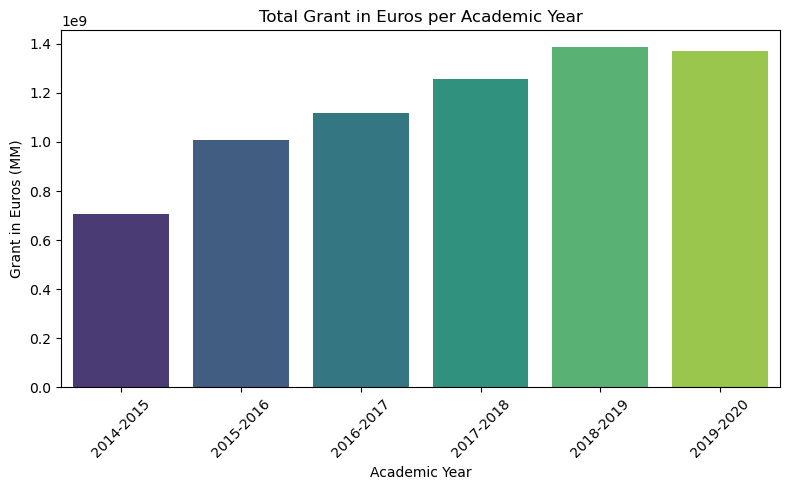

In [11]:
plot_bar('Total Grant in Euros per Academic Year', summary_df, 'academic_year', 'Academic Year', 'funding_sum', 'Grant in Euros (MM)')

We see that funding nearly doubled between 2014 and 2020, gradually increasing over the years.

### Funding by activity <a id="funding_activity"></a>

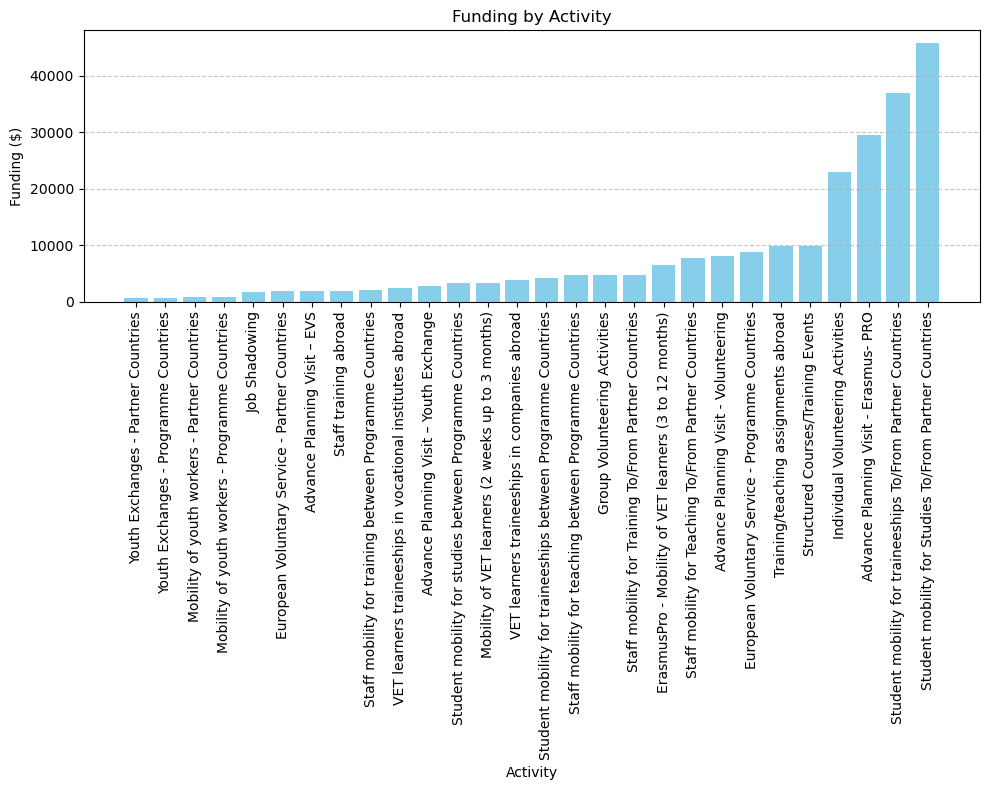

In [12]:
# Create the dictionary from two columns
funding_by_activity = dict(zip(erasmus['activity'], erasmus['allocated_grant']))

# Sort the dictionary by funding and extract sorted activities and fundings
sorted_funding_by_activity = dict(sorted(funding_by_activity.items(), key=lambda item: item[1]))

# Prepare data for plotting (Extract keys (activities) and values (fundings) from the sorted dictionary)
activities = list(sorted_funding_by_activity.keys())
fundings = list(sorted_funding_by_activity.values())

# Create the bar chart
plt.figure(figsize=(10, 8))  # Optional: to set the size of the figure
plt.bar(activities, fundings, color='skyblue')

# Add title and labels
plt.title('Funding by Activity')
plt.xlabel('Activity')
plt.ylabel('Funding ($)')
plt.xticks(rotation=90)  # Rotates the x labels to prevent overlap if necessary

# Optional: Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()

The majority of funding has gone to projects for students for studies and traineeships to/from partner countries.

### Total funding per country <a id="funding_country"></a>

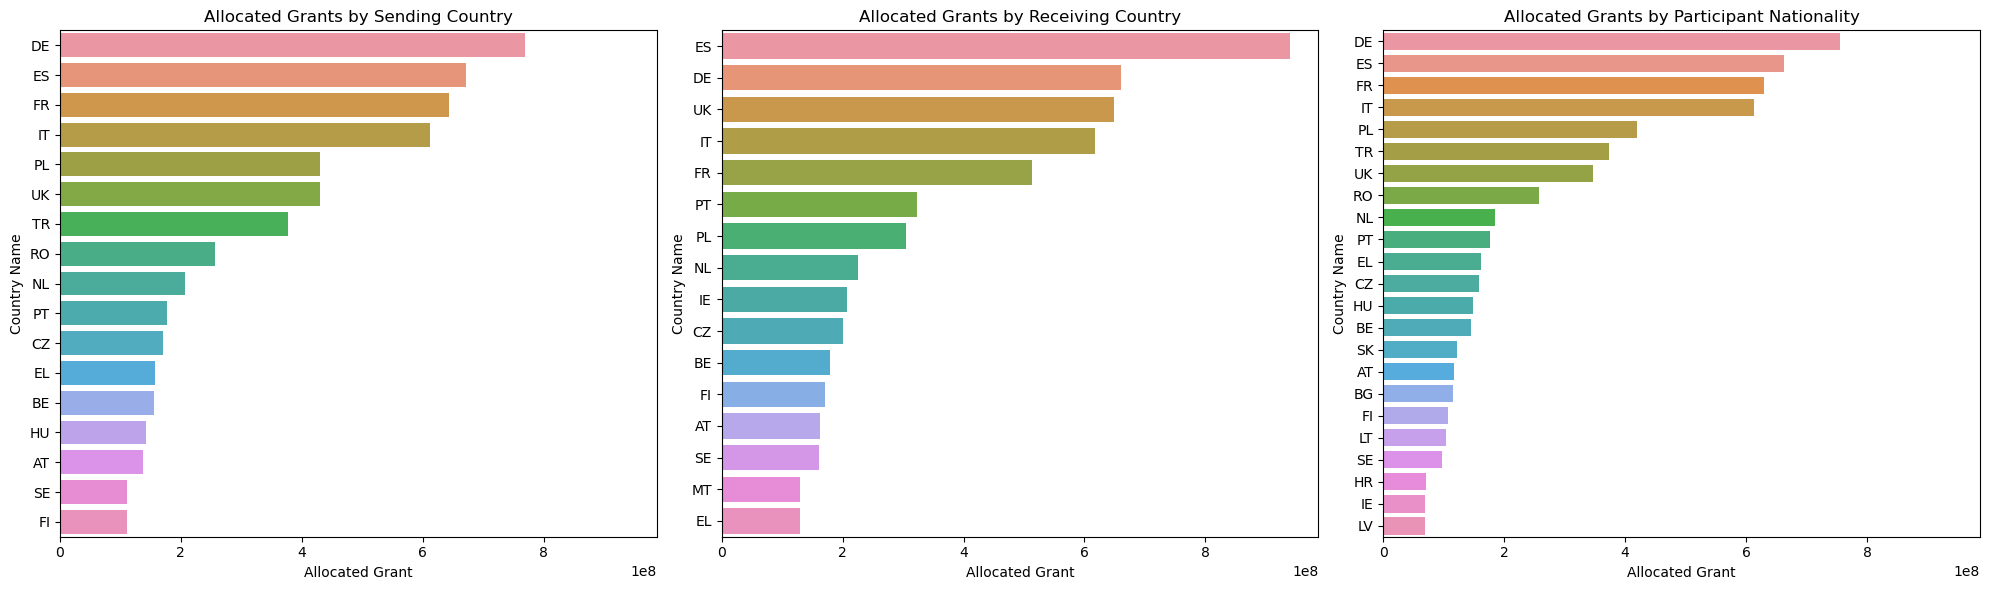

In [13]:
# Function to get the top 10% grants by country name for a given column
def get_top_10_percent_grants(erasmus, column_name):
    # Sum the allocated grants by country name
    country_grants = erasmus.groupby(column_name)['allocated_grant'].sum().reset_index()

    # Calculate the 90th percentile value for the 'allocated_grant' column
    percentile_90 = country_grants['allocated_grant'].quantile(0.90)

    # Filter the DataFrame to include only the top 10% entries
    country_grants_top_10_percent = country_grants[country_grants['allocated_grant'] > percentile_90]

    # Sort for better visualization
    country_grants_top_10_percent = country_grants_top_10_percent.sort_values(by='allocated_grant', ascending=False)
    
    return country_grants_top_10_percent

# Combine and compare the plots
def compare_allocated_grants(erasmus):
    columns = ['sending_country', 'receiving_country', 'participant_nationality']
    fig, axs = plt.subplots(1, 3, figsize=(20, 6), sharex=True)
    sns.set_palette("viridis")

    for i, column in enumerate(columns):
        top_10_percent_grants = get_top_10_percent_grants(erasmus, column)
        sns.barplot(x='allocated_grant', y=column, data=top_10_percent_grants, ax=axs[i])
        axs[i].set_title(f'Allocated Grants by {column.replace("_", " ").title()}')
        axs[i].set_xlabel('Allocated Grant')
        axs[i].set_ylabel('Country Name')

    plt.tight_layout()
    plt.show()
    
compare_allocated_grants(erasmus)

Germany and Spain dominate funding, in general, with France and Italy close behind. Poland, Portugal and the UK also figure in prominently. Turkey and Romania have high number of sending country participants.
If time had permitted, much more analysis could have been done here.

## Projects <a id="projects"></a>


### Number of projects per academic year <a id="projects_year"></a>

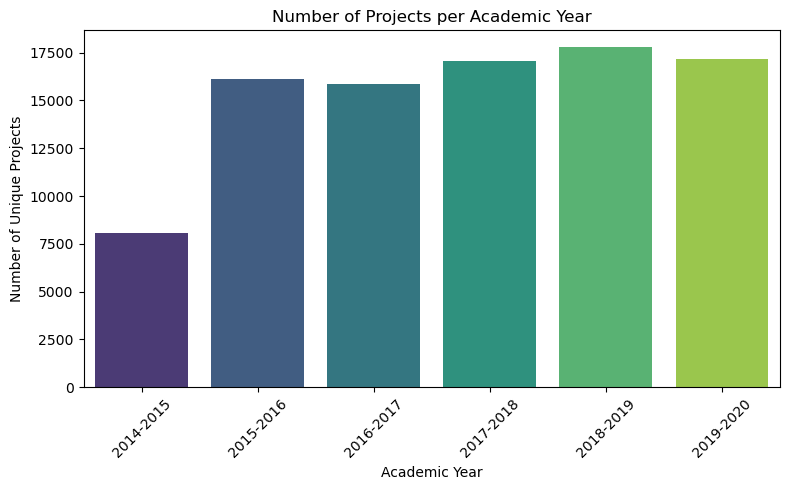

In [14]:
# Plot    
plot_bar('Number of Projects per Academic Year', summary_df, 'academic_year', 'Academic Year', 'project_count', 'Number of Unique Projects')

After an initial relatively low number of projects the first academic year, the number of projects essentially doubled and held steady over subsequent years.


### Relationship of projects and funding per academic year <a id="projects_funding_year"></a>

Let's look at the relationship between the number of projects per academic year and the funding for those projects.

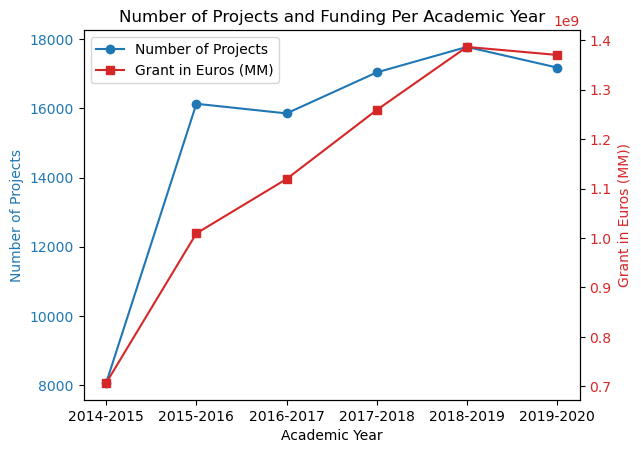

In [15]:
# Plotting
fig, ax1 = plt.subplots()

# Plot number of projects
ax1.set_xlabel('Academic Year')
ax1.set_ylabel('Number of Projects', color='tab:blue')
ax1.plot(summary_df['academic_year'], summary_df['project_count'], color='tab:blue', marker='o', label='Number of Projects')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Creating a twin Axes sharing the x-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Grant in Euros (MM))', color='tab:red')
ax2.plot(summary_df['academic_year'], summary_df['funding_sum'], color='tab:red', marker='s', label='Grant in Euros (MM)')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Handling the legend
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# Adding a title
plt.title('Number of Projects and Funding Per Academic Year')
    
# Display the plot
plt.show()

Funding has increased over the years and in the 2019-2020 academic fell slightly along with the number of projects.

### Average project duration by start month-year <a id="average_project_duration"></a>

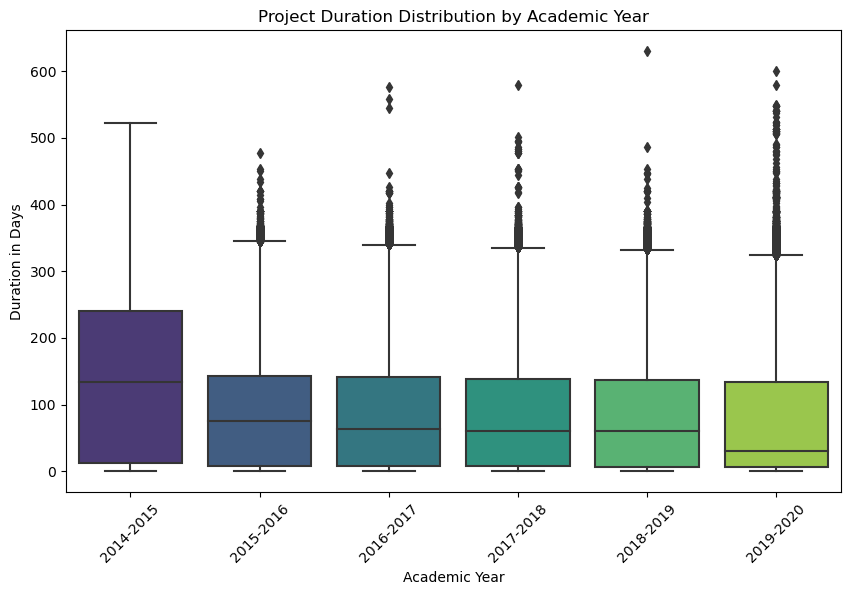

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='academic_year', y='duration_in_days', data=erasmus)
plt.title('Project Duration Distribution by Academic Year')
plt.xlabel('Academic Year')
plt.ylabel('Duration in Days')
plt.xticks(rotation=45)
plt.show()

Projects had a mean duration that was longer during the first academic year, 2014-2015, and experienced a drop in subsequent years but remained steady. 2019-2020 project mean duration was reduced to half that of previous years while funding and number of projects remained the same. 

### Number of projects started and ended by month, 2014-2019 <a id="projects_start_end_month"></a>

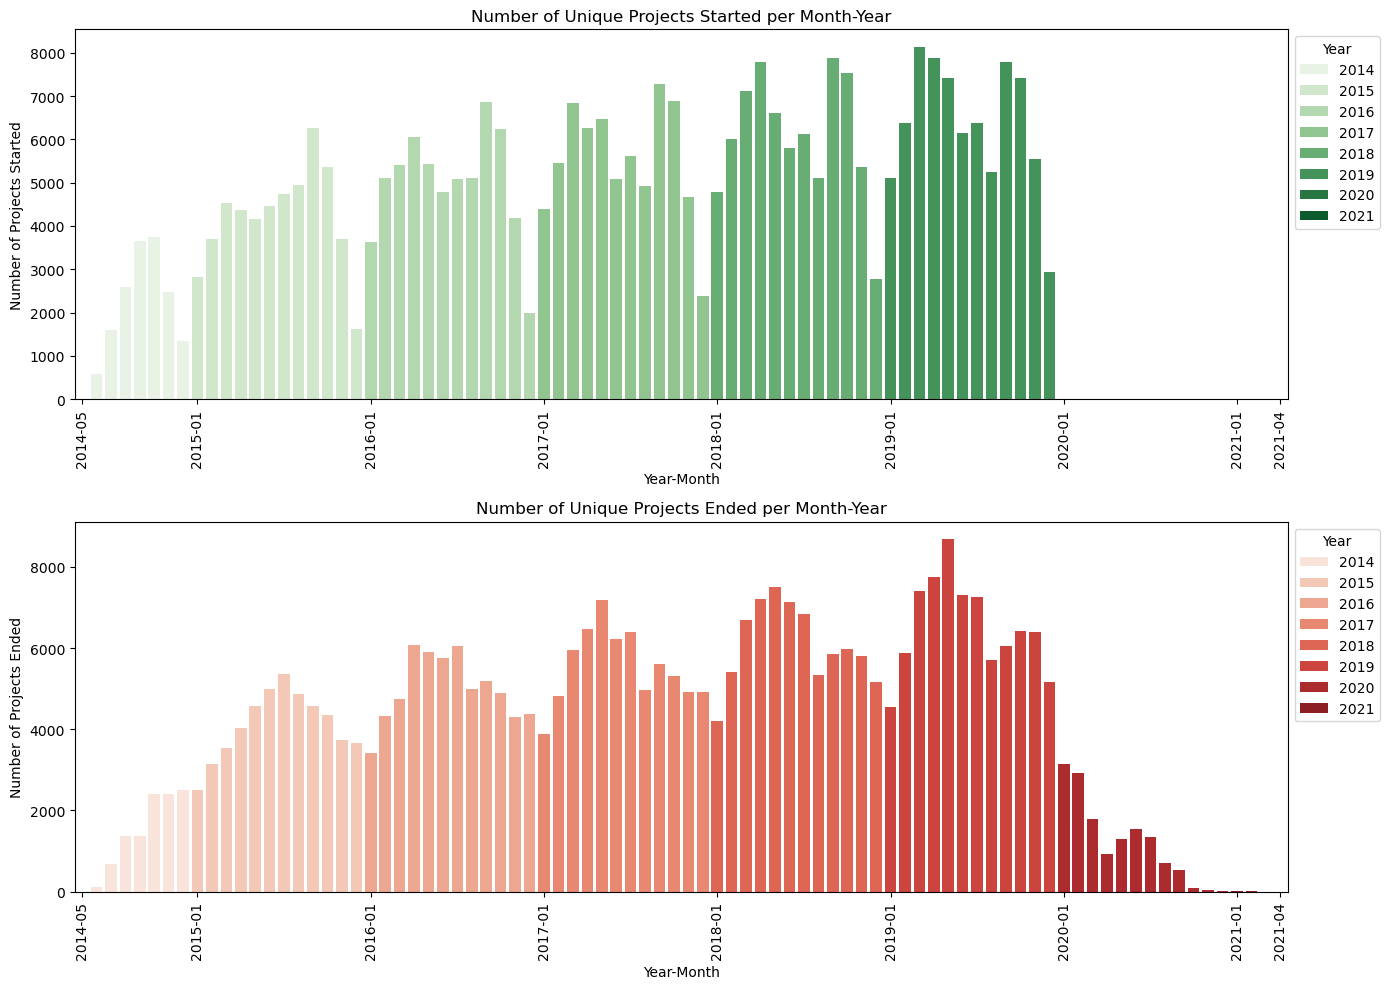

In [17]:
# Create new columns without modifying the original ones
erasmus['start_month_dt'] = pd.to_datetime(erasmus['start_month'], format='%Y-%m')
erasmus['end_month_dt'] = pd.to_datetime(erasmus['end_month'], format='%Y-%m')

# Extract year and month into new columns
erasmus['start_year_month'] = erasmus['start_month_dt'].dt.to_period('M')
erasmus['end_year_month'] = erasmus['end_month_dt'].dt.to_period('M')

# Extract years into new columns
erasmus['start_year'] = erasmus['start_month_dt'].dt.year
erasmus['end_year'] = erasmus['end_month_dt'].dt.year

# Group by year-month and count unique project_id for start and end
start_year_month_counts = erasmus.groupby(['start_year_month', 'start_year'])['project_id'].nunique().reset_index()
end_year_month_counts = erasmus.groupby(['end_year_month', 'end_year'])['project_id'].nunique().reset_index()

# Rename columns for clarity
start_year_month_counts.columns = ['year_month', 'year', 'unique_project_count_start']
end_year_month_counts.columns = ['year_month', 'year', 'unique_project_count_end']

# Merge both dataframes on year_month and fill NaN values with 0
all_month_counts = pd.merge(start_year_month_counts, end_year_month_counts, on=['year_month', 'year'], how='outer').fillna(0)

# Ensure the 'year_month' field is sorted
all_month_counts = all_month_counts.sort_values('year_month')

# Identifying ticks to show
first_tick = all_month_counts['year_month'].iloc[0]
last_tick = all_month_counts['year_month'].iloc[-1]
january_ticks = all_month_counts[all_month_counts['year_month'].dt.month == 1]['year_month']

x_ticks_to_show = pd.concat([pd.Series([first_tick]), january_ticks, pd.Series([last_tick])]).unique()

# Convert year_month to string
all_month_counts['year_month_str'] = all_month_counts['year_month'].astype(str)

# Plotting
plt.figure(figsize=(14, 10))

# For Start Month
plt.subplot(2, 1, 1)
sns.barplot(x=all_month_counts['year_month_str'], 
            y=all_month_counts['unique_project_count_start'], 
            hue=all_month_counts['year'],
            palette='Greens',
            dodge=False)  # Make the bars wider by setting dodge to False
plt.title('Number of Unique Projects Started per Month-Year')
plt.xlabel('Year-Month')
plt.ylabel('Number of Projects Started')
plt.xticks(rotation=90)

# Customize x-ticks
plt.xticks(ticks=[all_month_counts[all_month_counts['year_month'] == tick].index[0] for tick in x_ticks_to_show],
           labels=x_ticks_to_show, rotation=90)

plt.legend(title='Year', bbox_to_anchor=(1, 1))

# For End Month
plt.subplot(2, 1, 2)
sns.barplot(x=all_month_counts['year_month_str'], 
            y=all_month_counts['unique_project_count_end'], 
            hue=all_month_counts['year'],
            palette='Reds',
            dodge=False)  # Make the bars wider by setting dodge to False
plt.title('Number of Unique Projects Ended per Month-Year')
plt.xlabel('Year-Month')
plt.ylabel('Number of Projects Ended')
plt.xticks(rotation=90)

# Customize x-ticks
plt.xticks(ticks=[all_month_counts[all_month_counts['year_month'] == tick].index[0] for tick in x_ticks_to_show],
           labels=x_ticks_to_show, rotation=90)

plt.legend(title='Year', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

Above we see that the last group of projects provided by our data started in December of 2019.
We seem to have data that reports project end dates through September of 2020 so it seems our data was updated with project ends dates into 2021.
In any case, we consistently have over a thousand projects starting each month.

## Participants <a id="participants"></a>


### Participant start and end months <a id="participant_start_end_month"></a>

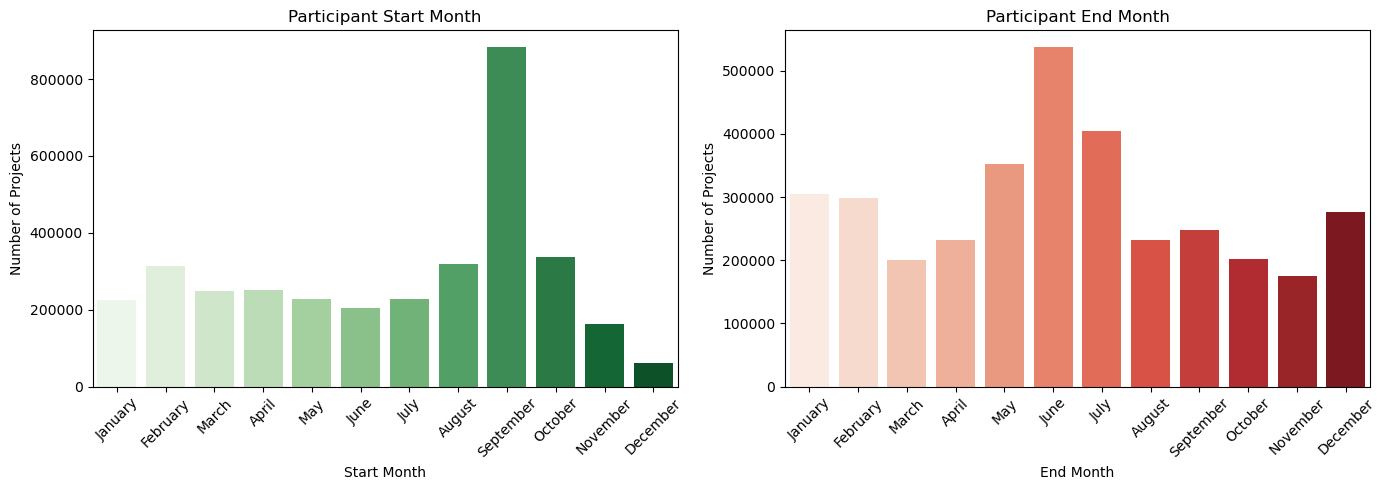

In [18]:
# 'start_month_dt' and 'end_month_dt' which were created previously
erasmus['start_month_num'] = erasmus['start_month_dt'].dt.month
erasmus['end_month_num'] = erasmus['end_month_dt'].dt.month

# Map month numbers to month names
erasmus['start_month_name'] = erasmus['start_month_num'].apply(lambda x: month_name[x])
erasmus['end_month_name'] = erasmus['end_month_num'].apply(lambda x: month_name[x])

plt.figure(figsize=(14, 5))

# For Start Month
plt.subplot(1, 2, 1)

# Group by month names and get the count of projects started each month
start_month_counts = erasmus['start_month_name'].value_counts().reindex(list(month_name[1:]), fill_value=0)
sns.barplot(x=start_month_counts.index, y=start_month_counts.values, palette='Greens')

plt.title('Participant Start Month')
plt.xlabel('Start Month')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45)

# For End Month
plt.subplot(1, 2, 2)    

# Group by month names and get the count of projects ended each month
end_month_counts = erasmus['end_month_name'].value_counts().reindex(list(month_name[1:]), fill_value=0)
sns.barplot(x=end_month_counts.index, y=end_month_counts.values, palette='Reds')
plt.title('Participant End Month')
plt.xlabel('End Month')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Clearly, participants tend to start in the month of September. Interestingly, it appears that participants tend to finish up either mid-year in June, which would correspond to the end of an academic year, or at the end of the year.

### Sending and receiving countries by participant <a id="send_receive_participant"></a>

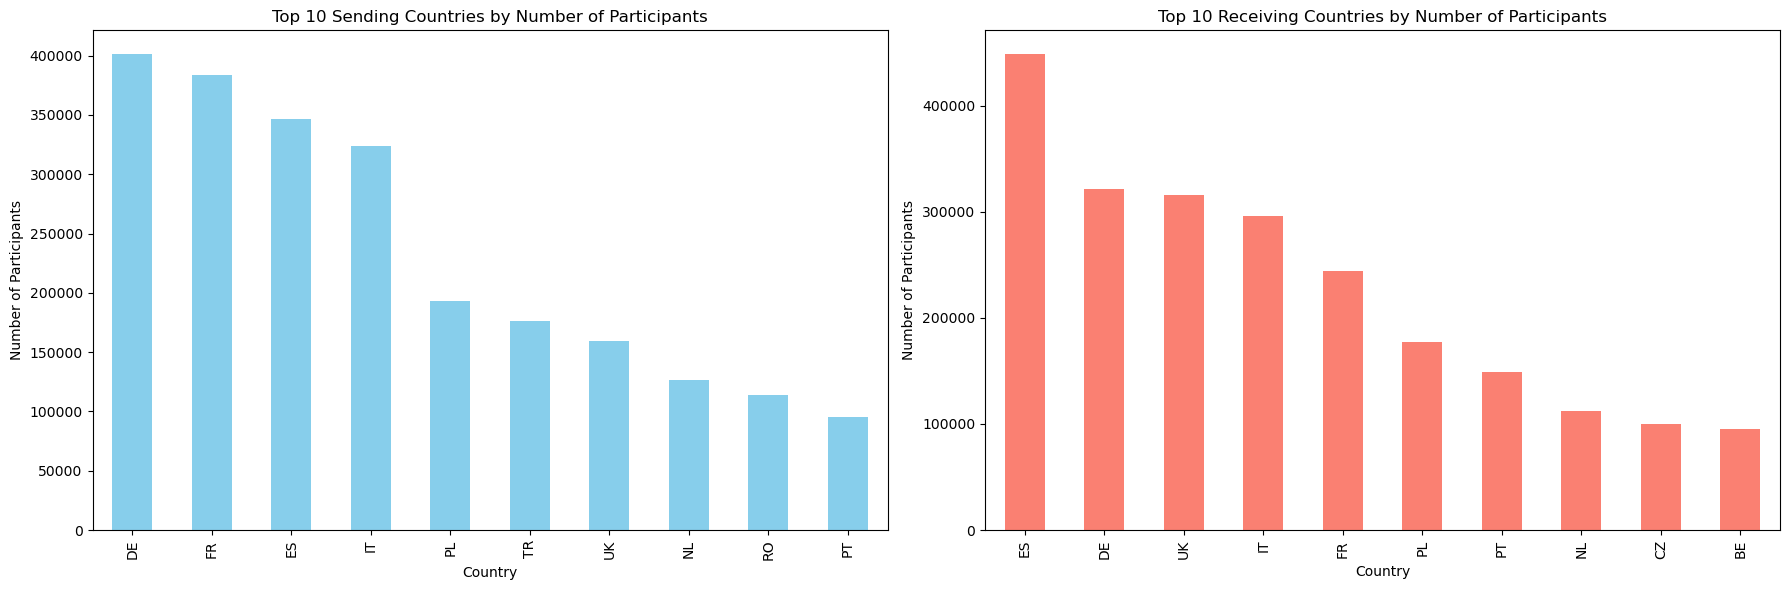

In [19]:
# Top 10 Sending Countries by Number of Mobilities
top_sending_countries = erasmus['sending_country'].value_counts().head(10)

# Top 10 Receiving Countries by Number of Mobilities
top_receiving_countries = erasmus['receiving_country'].value_counts().head(10)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot for Sending Countries
top_sending_countries.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Top 10 Sending Countries by Number of Participants')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Number of Participants')

# Plot for Receiving Countries
top_receiving_countries.plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Top 10 Receiving Countries by Number of Participants')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Number of Participants')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()

### Participant gender <a id="participant_gender"></a>


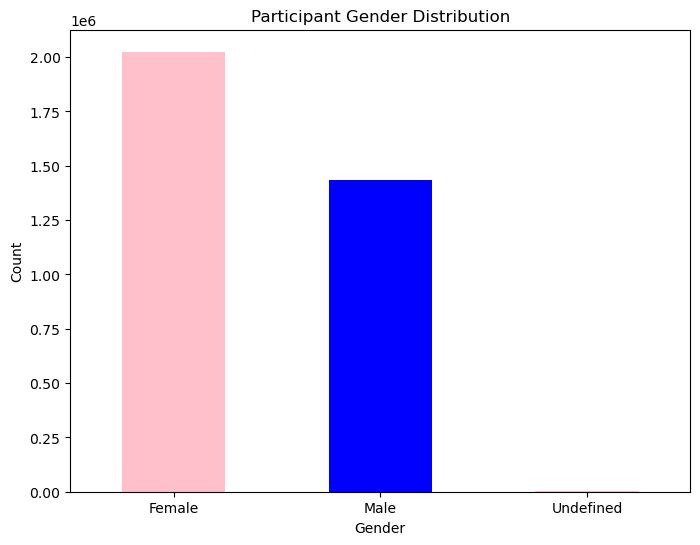

In [20]:
# Count the occurrences of each gender
gender_counts = erasmus['participant_gender'].value_counts()

# Plotting with Matplotlib
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['pink', 'blue'])
plt.title('Participant Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### Participant age <a id="participant_age"></a>


Text(0, 0.5, 'Count')

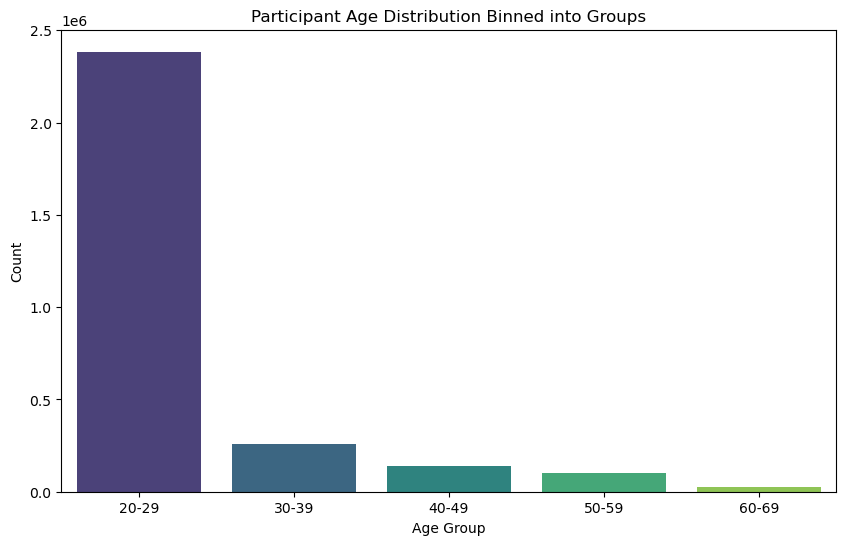

In [21]:
# Define age bins
bins = [20, 30, 40, 50, 60, 70]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69']

# Bin the participant ages
erasmus['age_group'] = pd.cut(erasmus['participant_age'], bins=bins, labels=labels, right=False)

# Plotting
plt.figure(figsize=(10, 6))

# Using seaborn for a more elegant histogram
sns.countplot(x='age_group', data=erasmus, palette='viridis')

# Title and labels
plt.title('Participant Age Distribution Binned into Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')

In [22]:
erasmus.to_csv('C:/Users/midol/Documents/Springboard/Springboard/Capstone_2/Erasmus/erasmus_eda.csv', index=False)

## Summary <a id="summary"></a>


Our goal is to predict which countries are most likely to receive future allocations. With this in mind, the EDA process thus far has highlighted that funding has increased over the years with the most going to projects for student study/traineeship to/from Partner countries. That said, Programme countries Germany and Spain have received the most funding, with France and Italy close behind. Poland, Portugal and the UK also figure in prominently and Turkey and Romania send high numbers of participants abroad for study.

When looking at projects, we saw that the first year had far fewer than subsequent years. Funding over the years has ranged from approximately 700,000 to 1.35 million euros. The 2015-2016 academic year experienced much lower funding than all other years. However, the number of projects and funding remained relatively consistent during the final two years covered by this analysis. Projects had a mean duration that was longer during the first academic year, 2014-2015, and experienced a drop in subsequent years but remained steady. 2019-2020 project mean duration was reduced to half that of previous years while funding and number of projects remained the same. Between 2014-2019 there were over 1,000 projects beginning in any given month.

Finally, we reviewed the participant data. Most participants began projects in September and ended in June, which makes sense as it follows the academic year in Europe. Approximately 25% more participants are female than male and the average participant age was 20-29.

We did some feature engineering by creating the `participant_id` and `allocated_grant` features.

Unfortunately, the time constraints of this bootcamp did not allow for further exploration at this time.


**For further exploration:**
- Distribution of project durations in days to understand the typical length of projects.
- One-hot encode 'activity' and plot various activities monthly over the years, with each activity overlapping one another. 
- Relationship between the academic year and the duration to see if there's any trend over years.
- Programme Country vs Partner Country
- Average project duration by activity
- Correlation matrices to identify significant correlations
- Analysis of the differences between sending and receiving countries in terms of participant demographics/mobility durations
- Group by academic year and compare the aggregate statistics like mean duration, median
- Funding per country over the years